In [2]:
from scipy.io import loadmat
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


%matplotlib inline

In [3]:
filelist = ["calcium_data/140708B_140811a_result", 
            "calcium_data/140909C_141112a_result", 
            "calcium_data/141006C_141121a_result",
            "calcium_data/150109A_150302a_result", 
            "calcium_data/151122A_160202a_result", 
            "calcium_data/151122B_160207a_result", 
            "calcium_data/160209A_160430a_result", 
            "calcium_data/160209B_160428a_result"]
filelist_roi = ["calcium_data/140708B_140811a_roi", 
            "calcium_data/140909C_141112a_roi", 
            "calcium_data/141006C_141121a_roi",
            "calcium_data/150109A_150302a_roi", 
            "calcium_data/151122A_160202a_roi", 
            "calcium_data/151122B_160207a_roi", 
            "calcium_data/160209A_160430a_roi", 
            "calcium_data/160209B_160428a_roi"]

In [4]:
f = h5py.File(filelist[0]+'.hdf5', 'r')

In [5]:
def fit_polynomial(filename, deg=6, exclude_mask=None):
    '''
    returns: ndarray of shape (deg+1, n_trials, n_dendrites)
    '''
    f = h5py.File(filename+'.hdf5', 'r')
    
    data = f['data']
    meta = f['meta']
    
    n_trials = data.shape[0]
    n_dendrites = data.shape[1]
    
    if exclude_mask:
        #remove unwanted trials
        pass
    
    coef_mat = np.zeros((deg+1, n_trials, n_dendrites))
    for i in range(n_trials):
        x = np.arange(0,180)
        y = data[i,:,:]

        coef = np.polynomial.polynomial.polyfit(x,y.T,deg)
        coef_mat[:, i, :] = coef
        
    return coef_mat

In [6]:
def get_poly_time(coef):
    '''
    returns: ndarray of shape (n_trials, n_dendrites, n_times)
    '''
    x = np.arange(0, 180)
    p = np.polynomial.polynomial.polyval(x, coef)
    
    return p

In [7]:
def get_feature_matrix(coef):
    '''
    returns: ndarray of shape (n_trials, (n_coef*n_dendrites)), with every row being (p0_all_dends, ..., p_n_all_dends)
    '''
    n_coef = coef.shape[0]
    n_trials = coef.shape[1]
    n_dendrites = coef.shape[2]
    
    X = np.zeros((n_trials, n_dendrites*n_coef))
    for i in range(n_trials):
        mat = coef[:,i,:]
        #print(mat.shape)
        for j in range(n_dendrites):
            #print(X[i, j*n_coef:(j+1)*n_coef].shape)
            X[i, j*n_coef:(j+1)*n_coef] = mat[:,j]
            
    return X

In [8]:
def get_orig_matrix(X, deg):
    n_trials = X.shape[0]
    print(X.shape)
    n_dendrites = X.shape[1]/(deg+1)
    assert(n_dendrites%1 == 0)
    n_dendrites = int(n_dendrites)
    
    data = np.zeros((deg+1, n_trials, n_dendrites))
    for i in range(n_trials):
        for j in range(n_dendrites):
            data[:, i, j] = X[i,j*(deg+1):(j+1)*(deg+1)]
    
    return data

In [11]:
def get_f_matrix(coef):
    n_coef = coef.shape[0]
    n_trials = coef.shape[1]
    n_dendrites = coef.shape[2]
    
    X = np.zeros((n_trials, n_dendrites*n_coef))
    for i in range(n_trials):
        for j in range(n_coef):
            X[i, j*n_dendrites:(j+1)*n_dendrites] = coef[j, i, :]
            
    return X

In [10]:
coef = fit_polynomial(filelist[0])
data = get_feature_matrix(coef)



In [ ]:
q=10
r=12

x = np.arange(0,180)

y = f['data'][r,q,:]
z = np.polyfit(x, y, 8)
p = np.poly1d(z)
p(x)

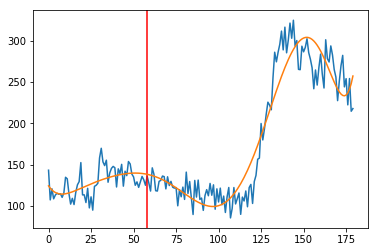

In [96]:
plt.plot(x, f['data'][r,q,:])
plt.axvline(58, color='r')
plt.plot(x, p(x))

In [196]:
mask = f['meta'][:,1] == 3
av = np.mean(f['data'][mask,:,:][:,0,:], axis=0)
x = np.linspace(0,3000,180)

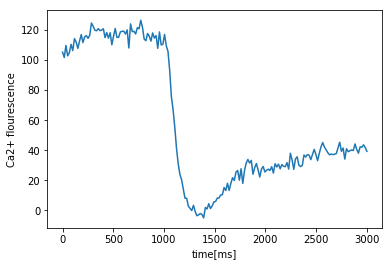

In [174]:
g = plt.figure()
plt.plot(x, av)
plt.xlabel('time[ms]')
plt.ylabel('Ca2+ flourescence')
g.savefig(filelist[0]+'_dendrite0_stim=3_trial_average', dpi=400)

In [5]:
data = loadmat(filelist_roi[0])

In [20]:
data['inFrameDend']

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [10]:
f['data'].shape

(350, 115, 180)

In [17]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'roi', 'driftMap', 'roi_stay', 'dend', 'inFrameDend'])